# Perturbed Quantum Mechanical Oscillator
Flora Hess (flora.hess@stud.uni-heidelberg.de)<br/>Leonardo K. Reiter (leonardo.reiter@stud.uni-heidelberg.de)<br/>Jason G. Jun (jun.jasongabriel@stud.uni-heidelberg.de)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
from scipy.linalg import eigh
from scipy.linalg import eigh_tridiagonal
from scipy.linalg import hessenberg
from scipy.sparse import diags
from scipy import integrate
%matplotlib inline

plt.rcParams["figure.figsize"] = 10, 10
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.facecolor"] = (0.2, 0.2, 0.2)
plt.rcParams["axes.edgecolor"] = (1.0, 1.0, 1.0)
plt.rcParams["grid.color"] = (0.6, 0.6, 0.6)
plt.rcParams["grid.linestyle"] = (3, 1)
plt.rcParams["legend.facecolor"]= (1.0, 1.0, 1.0)
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["ytick.left"] = True
# print(plt.rcParams.keys())

Calculate the eigenvalues of the perturbed quantum mechanical harmonic oscillator for $n = 0 \dots 9$ by approximating the operators in Hilbert space by matrices with finite dimension in the range $N = 15 \dots 30$.

The dimensionless Hamiltonian reads

\begin{align}
h = \frac{H}{  \omega} &= \left( \frac{1}{2} \Pi^2 + \frac{1}{2} Q^2 + \lambda Q^4 \right) \\
\left(h\right)_{nm} &= \left(h_0\right)_{nm} + \lambda \left(Q^4\right)_{nm}
\end{align}

where $\left(h_0\right)_{nm} = \left(n + \frac{1}{2}\right) \delta_{nm}$ is the unperturbed Hamiltonian.

## Subtask a):
Determine the matrix form of $Q^4$ using
$$Q_{nm} = \frac{1}{\sqrt{2}} \left(\sqrt{n+1} \delta_{n, m-1} + \sqrt{n} \delta_{n, m+1} \right) .$$
The best approach is to consider this problem in second quantisation and use the
properties of the creation and annihilation operators, $a$ and $\overline{a}$, as discussed in the
lecture.

The operator $Q$ can be written in terms of creation an annihilation operators, $\overline{a}$ and $a$, as follows:


\begin{eqnarray}
Q_{nm} &=&\frac{\sqrt{n+1}\delta_{n,m-1}+\sqrt{n}\delta_{n, m+1}}{\sqrt{2}}=\left<n\left|\frac{a+\overline{a}}{\sqrt{2}}\right|m\right>:=\left<n\left|Q\right|m\right>\Rightarrow Q = \frac{a+\overline{a}}{\sqrt{2}}\\
\left(Q^4\right)_{nm} &=& \left<n\left|Q^4\right|m\right>\\
&=& \left<n\left|\left(\frac{a+\overline{a}}{\sqrt{2}}\right)^4\right|m\right>\\
&=& \frac{1}{4}\left<n\left|(a^4+4a^3\overline{a}+6a^2\overline{a}^2+4a\overline{a}^3+\overline{a}^4-6a^2-12a\overline{a}-6\overline{a}^2+3)\right|m\right>\\
&=&  \frac{\delta_{n+4,m}\sqrt{\frac{(n+4)!}{n!}}+\delta_{n+2,m}2\left(2n+3\right)\sqrt{\frac{(n+2)!}{n!}}+\delta_{n,m}3\left(2(n+1)n+1\right)+\delta_{n,m+2}2\left(2m+3\right)\sqrt{\frac{(m+2)!}{m!}}+\delta_{n,m+4}\sqrt{\frac{(m+4)!}{m!}}}{4}\\
\end{eqnarray}

One can obtain the matrix representation of $Q^4$ just by taking the matrix $Q$ to the power of 4 as well.

In [10]:
def h0(N):
    return diags(np.arange(N)+.5, 0).toarray()

def h(N, lam = .1):
    return h0(N) + lam * Q4(N)

def Q(N):
    a1 = np.sqrt(np.arange(N-1)+1)
    return diags([ a1, a1], [ 1,-1]).toarray() / np.sqrt(2)

def Q4(N, method="analytic"):
    if method == "analytic":
        n = np.arange(N)
        a0 = 3 * (2 * (n + 1) * n + 1)
        a2 = 2 * (2 * n + 3) * np.sqrt((n + 1) * (n + 2))
        a4 = np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4))
        return diags([a0, a2, a2, a4, a4], [ 0, 2,-2, 4,-4]).toarray() / 4
    elif method == "numeric":
        return matrix_power(Q(N+10), 4)[:-10,:-10]

## Subtask b):
Compute the eigenvalues of $(h)_{nm}$ for the parameter $\lambda = 0.1$ as function of the matrix size $(N = 15 \dots 30)$. Demonstrate that your program works properly, just listing the eigenvalues is not sufficient.

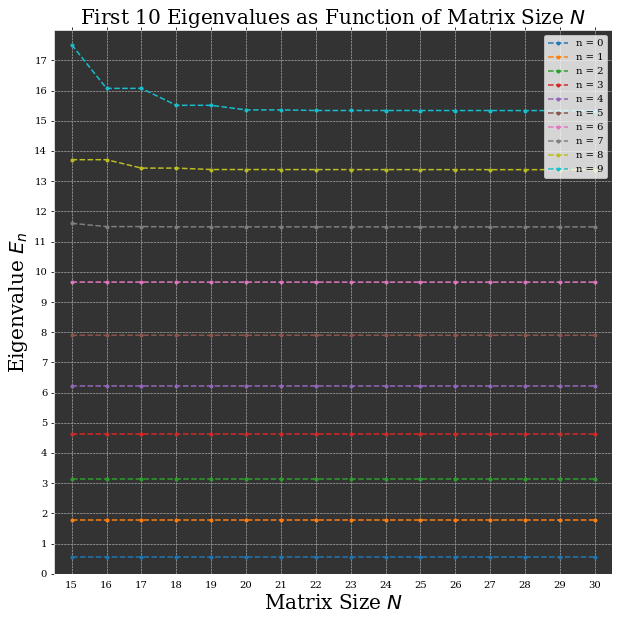

In [11]:
def calc_eigvalss(N_min, N_max, n_max, plot=False):
    N_range = np.arange(N_min, N_max+1)
    eigvalss = np.zeros((len(N_range), n_max))
    for N in N_range:
        eigvals, eigvecs = eigh(h(N))
        eigvalss[N-N_min] = eigvals[:n_max]
    if plot:
        y_lim = eigvalss.max().round(0)
        plt.plot(N_range, eigvalss, ls="--", marker=".")
        plt.title(f"First {n_max} Eigenvalues as Function of Matrix Size $N$")
        plt.xlabel("Matrix Size $N$")
        plt.xlim(N_min-.5, N_max+.5)
        plt.xticks(N_range)
        plt.ylabel("Eigenvalue $E_n$")
        plt.ylim(0, y_lim)
        plt.yticks(np.arange(y_lim))
        plt.legend([f"n = {i}" for i in range(n_max)])
        plt.show()
    return eigvalss

N_min, N_max, n_max = 15, 30, 10
eigvalss = calc_eigvalss(N_min, N_max, n_max, True)

## Subtask c):
Calculate the eigenvalues analytically using the linearized form of the equation, i.e. consider only the terms on the diagonal.

In [25]:
n_range, lam = np.arange(n_max), .1
eigvals = n_range + .5 + lam * 3 / 2 * (n_range**2 + n_range + .5)
print(f"First {n_max} Eigenvalues with Matrix Size {N_max}:")
print(f"Linearized:\t{eigvals.round(3)}")
print(f"Non-linearized:\t{eigvalss[-1].round(3)}")

First 10 Eigenvalues with Matrix Size 30:
Linearized:	[ 0.575  1.875  3.475  5.375  7.575 10.075 12.875 15.975 19.375 23.075]
Non-linearized:	[ 0.559  1.77   3.139  4.629  6.22   7.9    9.658 11.487 13.382 15.339]


## Subtask d):
Determine the eigenvalues by employing the Wentzel, Kramers,
and Brillouin (WKB) approximation applied to this system. Compare to the results
in (b) and (c) and discuss possible differences.

\begin{eqnarray}
V\left(x\right) &=& \frac{1}{2} x^2 + \lambda x^4\\
V\left(x_{0}\right) = E &\Rightarrow& x_{0} = \left(\frac{E}{\lambda}\right)^{\frac{1}{4}}\\
x_{min} = -x_{0}, x_{max} = x_{0} &\Rightarrow& \xi = \frac{x}{x_{0}}, \xi_{min} = -1, \xi_{max} = +1\\
\left(n + \frac{1}{2}\right)\pi &=& \int_{x_{min}}^{x_{max}}{dx\sqrt{2 \left(E-V\left(x\right)\right)}} = x_{0}\int_{-1}^{+1}{d\xi \sqrt{2 E}\sqrt{1-\frac{V(x)}{E}}} = \left(\frac{E}{\lambda}\right)^{\frac{1}{4}}\sqrt{2E}\int_{-1}^{+1}{d\xi\sqrt{1-\xi^{4}}}\\
\left(n + \frac{1}{2}\right)\pi  &=& E^{\frac{3}{4}}\left(\frac{4}{\lambda}\right)^{\frac{1}{4}}\int_{-1}^{+1}{d\xi\sqrt{1-\xi^{4}}}\\
E_n &=& \left(\frac{\frac{\pi }{\sqrt{2}}\left(n + \frac{1}{2}\right)}{\int_{-1}^{+1}{d\xi\sqrt{1-\xi^{4}}}}\right)^{\frac{4}{3}}\lambda^{\frac{1}{3}}\\
\end{eqnarray}

WKB-Approx.:	[ 0.254  1.097  2.168  3.395  4.747  6.203  7.75   9.38  11.083 12.855]


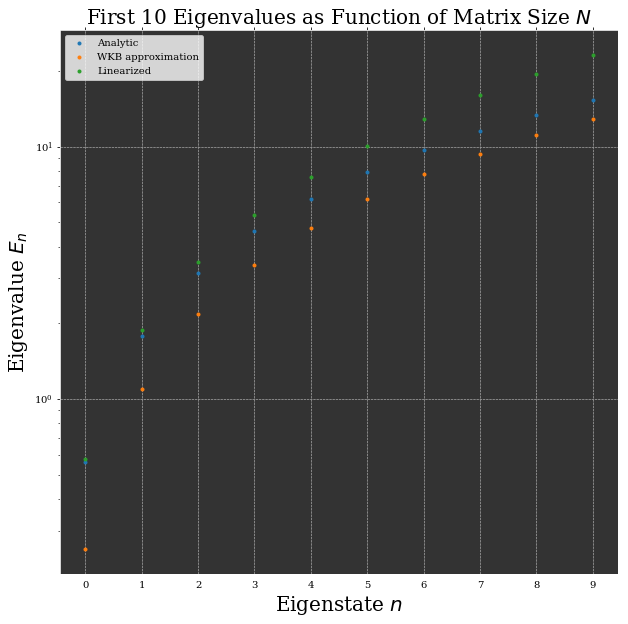

In [48]:
def e(n, lam = .1):
    func = lambda x: np.sqrt(1-x**4)
    return lam**(1/3) * ( np.pi / np.sqrt(2) *(n + 0.5)  / integrate.quad(func, -1, 1)[0])**(4/3)
eigvals_WKB = e(n_range)
print(f"WKB-Approx.:\t{eigvals_WKB.round(3)}")

plt.plot(n_range, eigvalss[-1], ls="", marker=".", label="Analytic")
plt.plot(n_range, eigvals_WKB, ls="", marker=".", label="WKB approximation")
plt.plot(n_range, eigvals, ls="", marker=".", label="Linearized")
plt.title(f"First {n_max} Eigenvalues as Function of Matrix Size $N$")
plt.ylabel("Eigenvalue $E_n$")
plt.xlabel("Eigenstate $n$")
plt.xticks(n_range)
plt.yscale("log")
plt.legend()
plt.show()